<a href="https://colab.research.google.com/github/SWOT-community/CNES-AVISO/blob/main/SWOT_L3_LR_SSH_startup_tutorial_AVISO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SWOT L3 KaRIn and Nadir Ocean Data Products

This tutorial will introduce you to some sample SWOT L3 data products and show you how to download these data from AVISO and perform basic plots using Python related libraries.

## Tutorial Objectives:
- Present SWOT sample L3 data products (Basic and Expert versions)
- Show you how to find and visualize SWOT data sets from AVISO FTP server
- Download SWOT KaRIn (2D swath) and nadir (along-track) altimetry combined data directly to Google Colab.

Start by installing a couple of modules we will need: `condacolab` and `cartopy`

## Google Colaboratory

We will run this tutorial in [Google Colaboratory](colab.research.google.com). Google Colab is a web-based computational environment in which you can read, write, and execute interactive *notebooks* like the one you are reading. The python code runs on a virtual machine in the cloud, so you don't need to install python on your local machine.

Before you begin the lab, you might like to [sign up](https://accounts.google.com/signup) for a free Google account. If you do not wish to sign up for a Google account, that's fine: you will still be able to run the lab in "sandbox" mode. You just won't be able save any changes you make.

### Colaboratory and Google Drive

If you have a Google account, you can mount your Google drive within the Colab environment. This is not required to run the lab. But if you would like to save output you can do so by navigating to `drive/'My Drive'`

```
from google.colab import drive
drive.mount('/content/drive')
!ls drive/'My Drive'
```

If you would like, you can save a copy of this notebook to your local machine or to your Google drive so you can save your output or see any notes you made within the notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#!ls drive/'My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
! mamba install -q -c conda-forge cartopy

Now let's import libraries.

In [ ]:
import requests
import numpy as np
import xarray as xr

import os
import ftplib
import cartopy.crs as ccrs
import cartopy.feature as cft
import cartopy.mpl.geoaxes as cmplgeo
import cartopy.mpl.gridliner as cmplgrid
import matplotlib.pyplot as plt
%matplotlib inline

### Download the SWOT sample L3 data products




In [ ]:
def download_file_from_ftp(ftp, filename, target_directory):
    try:
        local_filepath = os.path.join(target_directory, filename)
        with open(local_filepath, 'wb') as file:
            ftp.retrbinary('RETR %s' % filename, file.write)
            print(f"Downloaded {filename}")
    except Exception as e:
        print(f"Error downloading {filename}: {e}")

def main_SWOT_L3_basic():
    # Set up directories
    ftpAVISO = 'ftp-access.aviso.altimetry.fr'
    ftp_L3_basic_path = '/data/swot_beta_products/l3_karin_nadir/1day_orbit/basic/alpha_v0_2/'
    filename = 'SWOT_L3_LR_SSH_Basic_488_007_20230412T005730_20230412T014836_v0.2.nc'
    SWOT_L3_SSH = '/content/drive/My Drive/ColabNotebooks/SWOT_L3_SSH/'  # Replace with the desired directory

    try:
        # Logging into FTP server using SWOT ST credentials
        with ftplib.FTP(ftpAVISO) as ftp:
            ftp.login("swot_st", "swot_st;23")
            ftp.cwd(ftp_L3_basic_path)
            print(f"Connection Established {ftp.getwelcome()}")

            # Check if the file exists in the directory
            if filename in ftp.nlst():
                download_file_from_ftp(ftp, filename, SWOT_L3_SSH)
            else:
                print(f"File {filename} does not exist in the directory.")
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main_SWOT_L3_basic()

def main_SWOT_L3_expert():
    # Set up directories
    ftpAVISO = 'ftp-access.aviso.altimetry.fr'
    ftp_L3_expert_path = '/data/swot_beta_products/l3_karin_nadir/1day_orbit/expert/alpha_v0_2/'
    filename = 'SWOT_L3_LR_SSH_Expert_488_007_20230412T005730_20230412T014836_v0.2.nc'
    SWOT_L3_SSH = '/content/drive/My Drive/ColabNotebooks/SWOT_L3_SSH/'  # Replace with the desired directory

    try:
        # Logging into FTP server using SWOT ST credentials
        with ftplib.FTP(ftpAVISO) as ftp:
            ftp.login("swot_st", "swot_st;23")
            ftp.cwd(ftp_L3_expert_path)
            print(f"Connection Established {ftp.getwelcome()}")

            # Check if the file exists in the directory
            if filename in ftp.nlst():
                download_file_from_ftp(ftp, filename, SWOT_L3_SSH)
            else:
                print(f"File {filename} does not exist in the directory.")
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main_SWOT_L3_expert()

Connection Established 220 192.168.10.119 FTP server ready
Downloaded SWOT_L3_LR_SSH_Basic_488_007_20230412T005730_20230412T014836_v0.2.nc
Connection Established 220 192.168.10.119 FTP server ready
Downloaded SWOT_L3_LR_SSH_Expert_488_007_20230412T005730_20230412T014836_v0.2.nc


In [ ]:
# Set file names
half_orbit_basic = os.path.join('/content/drive/My Drive/ColabNotebooks/SWOT_L3_SSH/', "SWOT_L3_LR_SSH_Basic_488_007_20230412T005730_20230412T014836_v0.2.nc")
half_orbit_expert = os.path.join('/content/drive/My Drive/ColabNotebooks/SWOT_L3_SSH/', "SWOT_L3_LR_SSH_Expert_488_007_20230412T005730_20230412T014836_v0.2.nc")

In [ ]:
# Select regional boundaries
lolabox = [-90, -30, 20, 60] # Gulf Stream

## Basic product content
This product contains two versions of the sea level anomaly (ssha). The ssha_noiseless field is obtained by denoising the ssha field. The mean dynamic topography is also included in order to derive the absolute dynamic topography. Finally, the nadir sea level anomaly has been combined in the KaRIn swath, with the i_num_line and i_num_pixel fields indexing its location in the grid.


In [ ]:
ds_basic =  xr.open_dataset(half_orbit_basic)
[v for v in ds_basic.variables]

['time',
 'latitude',
 'longitude',
 'mdt',
 'ssha',
 'ssha_noiseless',
 'i_num_line',
 'i_num_pixel']

## Expert product content
This product contains all the Basic fields, and additionnal fields that allows
a deeper investigation by Expert users. This includes the corrections used for
the SLA and the currents (absolute and relative) computed for the denoised SLA.

In [ ]:
ds_expert = xr.open_dataset(half_orbit_expert)
[v for v in ds_expert.variables if v not in ds_basic]
ds_expert = ds_expert.assign_coords(longitude=(((ds_expert.longitude + 180) % 360) - 180))

# Select data over the region
lolasubset = (
(ds_expert.longitude > lolabox[0]) &
(ds_expert.longitude < lolabox[1]) &
(ds_expert.latitude > lolabox[2]) &
(ds_expert.latitude < lolabox[3]))

ds_expert_sub = ds_expert.where(lolasubset, drop=True)

## SWOT nadir data
- The nadir data can be extracted from the dataset using the i_num_line and i_num_pixel indexes.

- The nadir positions and time are an estimation that combines the swath positions and time with
the indexes.

In [ ]:
# Build nadir variable
ds_expert["time_nadir"] = ds_expert.time[ds_expert.i_num_line]
ds_expert["longitude_nadir"] = ds_expert.longitude[ds_expert.i_num_line, ds_expert.i_num_pixel]
ds_expert["latitude_nadir"] = ds_expert.latitude[ds_expert.i_num_line, ds_expert.i_num_pixel]
ds_expert["sla_nadir"] = ds_expert.ssha[ds_expert.i_num_line, ds_expert.i_num_pixel]

# Select nadir data over the region (using num_nadir dimension only)
lolasubset_nadir = (
(ds_expert.longitude_nadir > lolabox[0]) &
(ds_expert.longitude_nadir < lolabox[1]) &
(ds_expert.latitude_nadir > lolabox[2]) &
(ds_expert.latitude_nadir < lolabox[3]))

ds_nadir = ds_expert.drop_dims(["num_lines", "num_pixels"]).where(lolasubset_nadir, drop=True)

### Visualize the data: basic SLA plots
Let's visualize SWOT KaRIn abd Nadir data using cartopy.

Adapt this code to visualize other variables or regions, or try importing another file.

/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


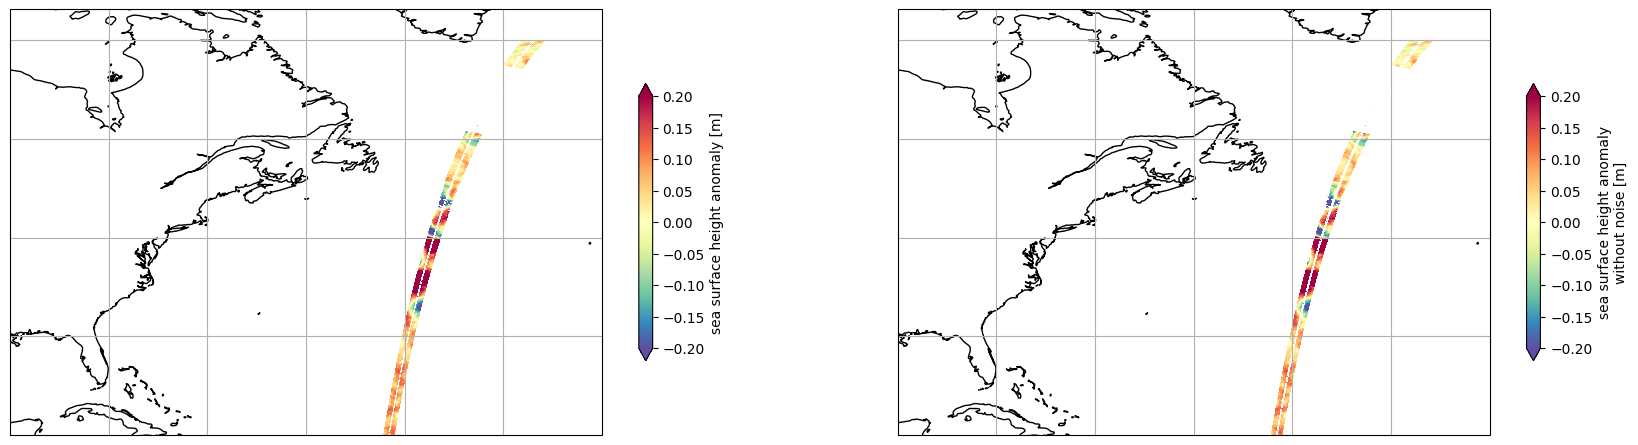

In [ ]:
# set figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 12), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax1.set_extent(lolabox)
ax2.set_extent(lolabox)
plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="Spectral_r",
    vmin=-0.2,
    vmax=0.2,
    cbar_kwargs={"shrink": 0.3},)

# SWOT KaRIn SLA plots
ds_expert_sub.ssha.plot.pcolormesh(ax=ax1, **plot_kwargs)
ds_expert_sub.ssha_noiseless.plot.pcolormesh(ax=ax2, **plot_kwargs)
#
ax1.coastlines()
ax1.gridlines()
ax2.coastlines()
ax2.gridlines()

Let's plot SWOT Nadir data only using cartopy.

Text(0.5, 0, 'latitude [degrees_north]')

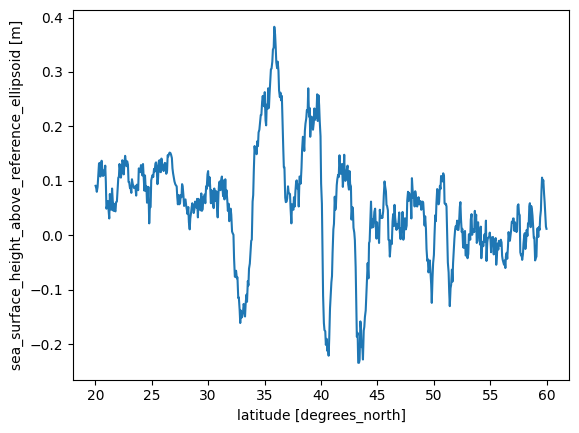

In [ ]:
plt.plot(ds_nadir.latitude_nadir.values, ds_nadir.sla_nadir.values)
plt.ylabel(f'{ds_nadir.sla_nadir.attrs["standard_name"]} [{ds_nadir.sla_nadir.attrs["units"]}]')
plt.xlabel(f'{ds_nadir.latitude_nadir.attrs["standard_name"]} [{ds_nadir.latitude_nadir.attrs["units"]}]')

## Remove nadir data from L3 data set
It is possible to remove the nadir data combined with L3 KaRIn data.

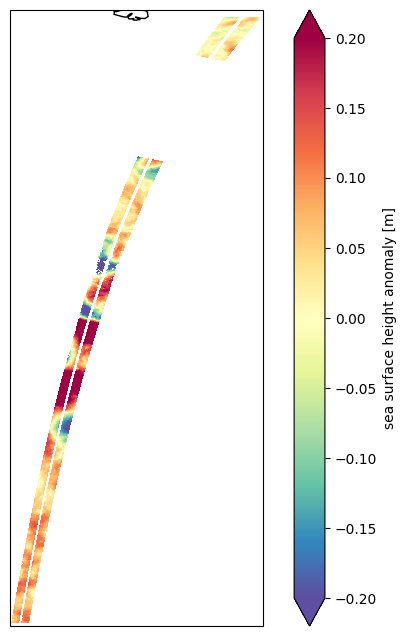

In [ ]:
# Masking must be done prior regional subsetting
ssha = ds_expert.ssha
ssha[ds_expert.i_num_line, ds_expert.i_num_pixel] = np.nan

# Regional subsetting
ssha_area = ssha.where(lolasubset, drop=True)

# plot SLA KaRIn data only
del plot_kwargs["cbar_kwargs"]
mesh = ssha_area.plot.pcolormesh(
figsize=(8, 8),
subplot_kws=dict(projection=ccrs.PlateCarree()),
**plot_kwargs)
mesh.axes.coastlines()